In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataset=pd.read_csv('gdrive/My Drive/Google_Stock_Price_Train.csv')

In [9]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
training_set=dataset.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

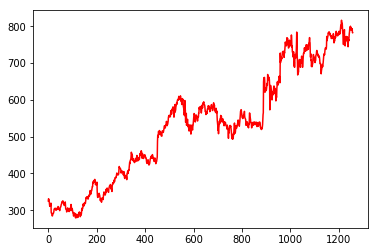

In [11]:
plt.plot(training_set,color='red',label='5 Years Google Stock price')

In [12]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [14]:
# creating the data structure with 60 time spot and 1 out put

X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
  
X_train,y_train=np.array(X_train),np.array(y_train)
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [27]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [0]:
#building the RNN
#import the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
#inintializing the RNN
regressor=Sequential()

In [0]:
#adding the first lstm layer and some dropout regularisation
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Dense(units=1))

In [0]:
#compiling the rnn
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [38]:
X_train.shape

(1198, 60, 1)

In [39]:
y_train.shape

(1198,)

In [40]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1198/1198 [==============================] - 11s 9ms/step - loss: 0.0567
Epoch 2/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0057
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0046
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0055
Epoch 6/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0052
Epoch 7/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] 

In [0]:
#making the predection and visualising the results
#getting the real stock price of 2017
dataset_test=pd.read_csv('gdrive/My Drive/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

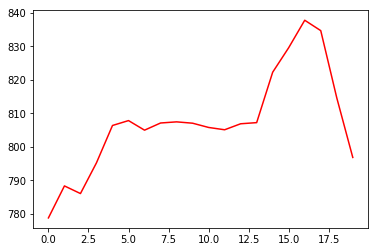

In [43]:
plt.plot(real_stock_price,color='red',label='Real Google Stock price')

In [0]:
#getting the predicted stock price of 2017
dataset_total=pd.concat((dataset['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

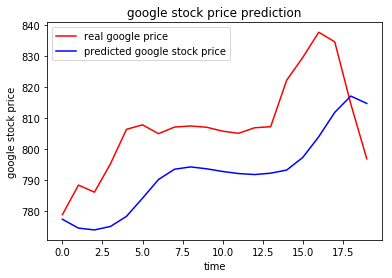

In [48]:
plt.plot(real_stock_price,color='red',label='real google price')
plt.plot(predicted_stock_price,color='blue',label='predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('time')
plt.ylabel('google stock price')
plt.legend()
plt.show()